# 統合棒グラフ（図２）



In [1]:
%pip install -q pandas nbformat plotly

import pandas as pd
pd.set_option('display.max_rows', 10)    # 大きな表の表示領域を上下5行分のみに制限する設定

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'   # 図の背景色を白に設定

# 注意

以下のスクリプトは本実習で用いる５つのデータセットを読み込みます。実習1で扱ったように、ここでも `.assign(size=...)` によって各データセットを区別しています。

In [17]:
cnm100 = pd.read_csv(f'data/cnm/time-join-100K.data', sep=' ', names=['joins', 'etime']).assign(size='100')
cnm200 = pd.read_csv(f'data/cnm/time-join-200K.data', sep=' ', names=['joins', 'etime']).assign(size='200')
cnm300 = pd.read_csv(f'data/cnm/time-join-300K.data', sep=' ', names=['joins', 'etime']).assign(size='300')
cnm400 = pd.read_csv(f'data/cnm/time-join-400K.data', sep=' ', names=['joins', 'etime']).assign(size='400')
cnm500 = pd.read_csv(f'data/cnm/time-join-500K.data', sep=' ', names=['joins', 'etime']).assign(size='500')

ここで読み込んだ5つのデータセットを、やはり実習1と同様に `pd.concat([...])` によって、ひとつに統合しましょう。

In [35]:
cnm_series = pd.concat([cnm500, cnm400, cnm300, cnm200, cnm100])
cnm_series

,joins,etime,size
0,10000,0.331,500
1,20000,427.200,500
2,30000,1606.702,500
3,40000,1454.240,500
4,50000,1023.245,500
...,...,...,...
3,40000,45.189,100
4,50000,15.939,100
5,60000,4.991,100
6,70000,3.336,100


Plotly Express で棒グラフを出力するには `px.bar(データセット, ...)` を用います。二つの軸と、データセットを色で区別するやり方は、実習1のときとよく似ています。

ただし、複数の棒を重ね描きするための指示として `barmode='overlay'` を指定しています。`overlay` は重ね描きを意味します。

また、Plotly は重ね描きを指定されると、重ね描きする対象を半透明化します。この機能を抑制するために `opacity=1` によって不透明度を最大に設定して半透明にならないように指定しています。

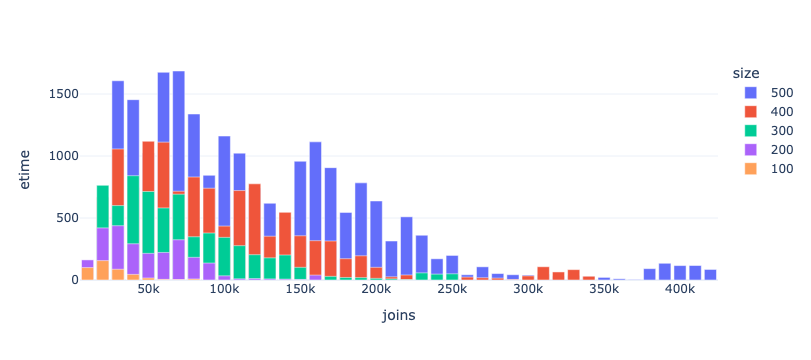

In [44]:
px.bar(cnm_series, x='joins', y='etime', color='size',
       barmode='overlay', opacity=1)

お手本では、データセットの区別は色ではなく白黒の模様で表現しています。模様の指定方法はすこし複雑ですが、以下のように設定できます。

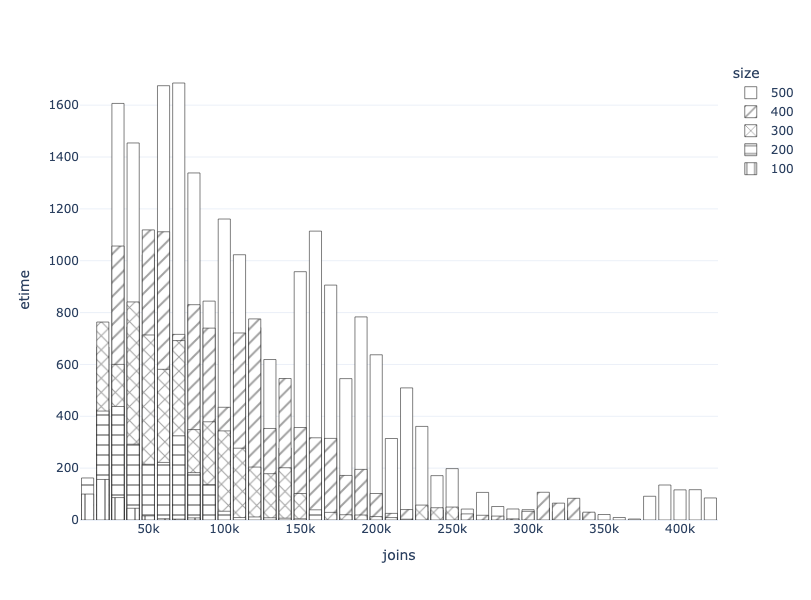

In [40]:
fig = px.bar(cnm_series, x='joins', y='etime',
             pattern_shape='size', pattern_shape_sequence=['', '/', 'x', '-', '|'],
             barmode='overlay', opacity=1,
             width=800, height=600)

fig.update_traces(
    marker=dict(color='white', line_color='black')
)

画像ファイルを出力する方法もこれまでの実習と同様です。

In [ ]:
fig.write_image('images/fig2-cnm-joins-time-series.pdf')